In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy import stats

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Dengan menggunakan describe() kita bisa melihat sekilas bagaimana data yang kita miliki. Misalnya, umur paling tua yang ada di dataset adalah 77, dengan rata-rata yang dimiliki adalah 54 tahun. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Disini kita tidak memiliki missing values sehingga kita tidak perlu menghapus missing values

# Visualisasi Data

In [6]:
kategorik = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numerik = ['age','trestbps','chol','thalach','oldpeak']

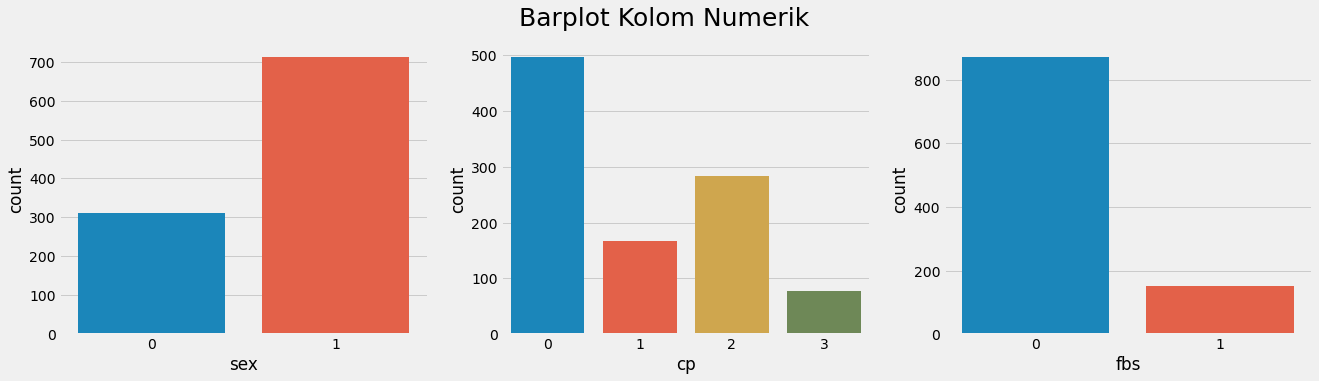

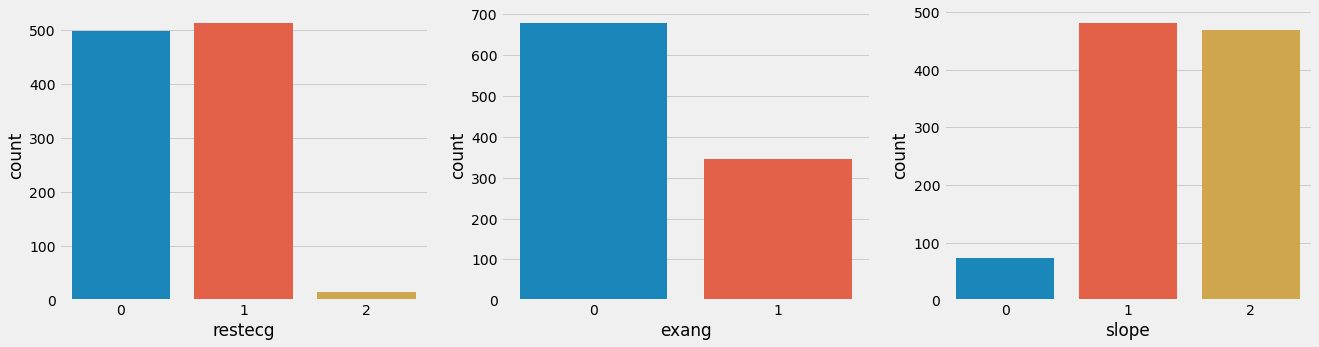

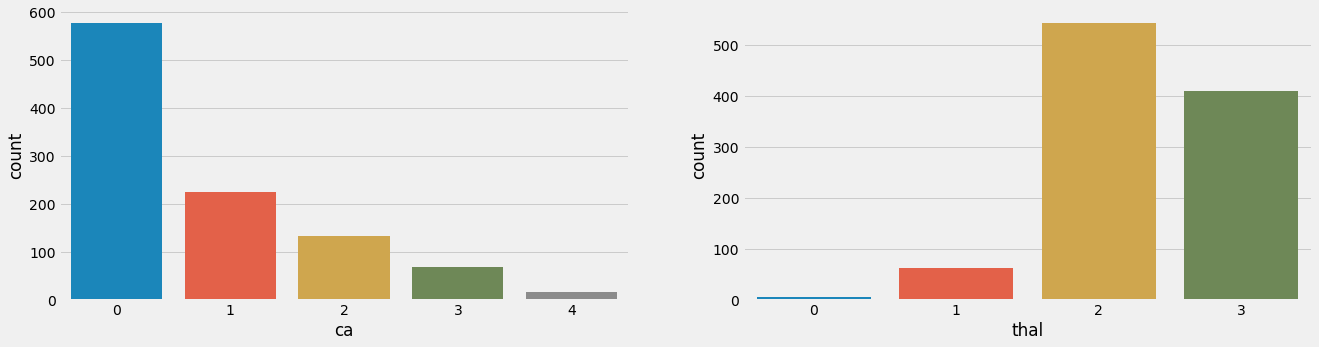

In [7]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Barplot Kolom Numerik', fontsize=25)
sns.countplot(x='sex',data=data,ax=ax[0])
sns.countplot(x='cp',data=data,ax=ax[1])
sns.countplot(x='fbs',data=data,ax=ax[2])

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='restecg',data=data,ax=ax[0])
sns.countplot(x='exang',data=data,ax=ax[1])
sns.countplot(x='slope',data=data,ax=ax[2])

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='ca',data=data,ax=ax[0])
sns.countplot(x='thal',data=data,ax=ax[1])
plt.show()

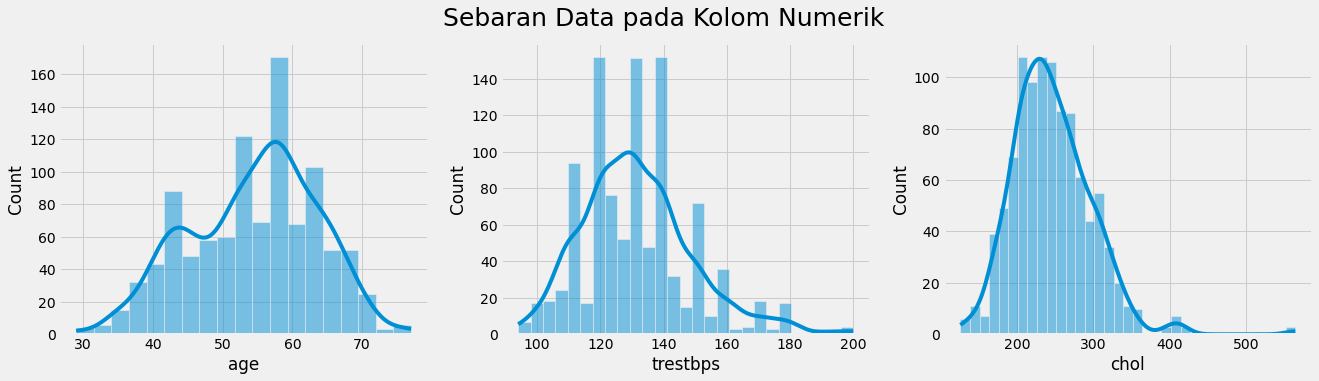

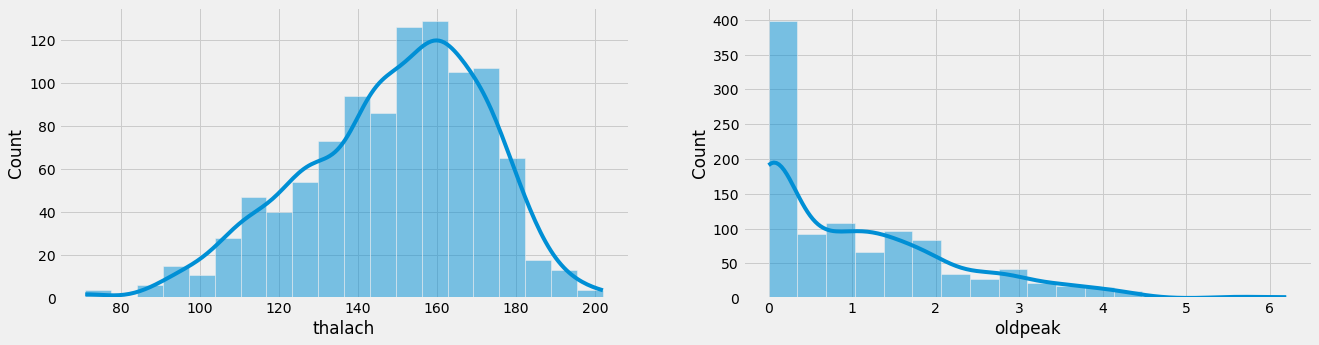

In [8]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Sebaran Data pada Kolom Numerik', fontsize=25)
sns.histplot(data['age'],kde=True,ax=ax[0])
sns.histplot(data['trestbps'],kde=True,ax=ax[1])
sns.histplot(data['chol'],kde=True,ax=ax[2])

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.histplot(data['thalach'],kde=True,ax=ax[0])
sns.histplot(data['oldpeak'],kde=True,ax=ax[1])

plt.show()

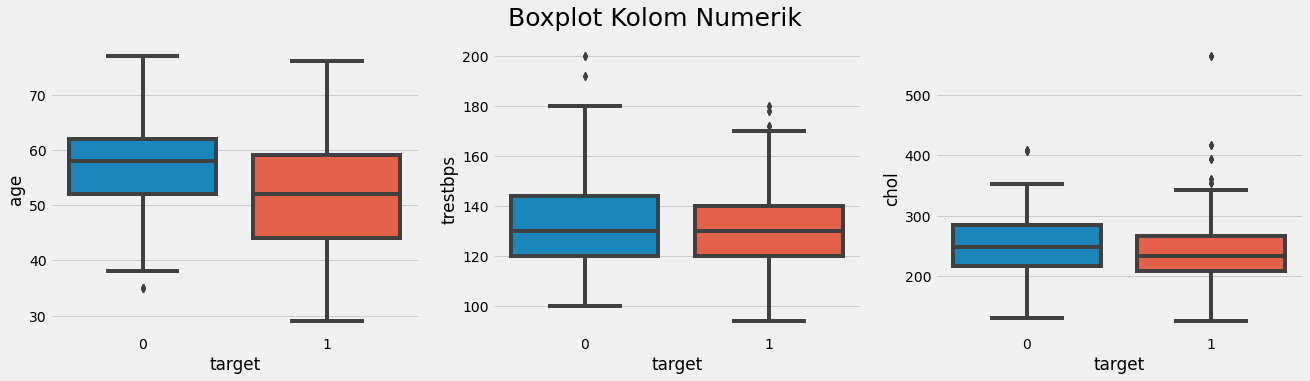

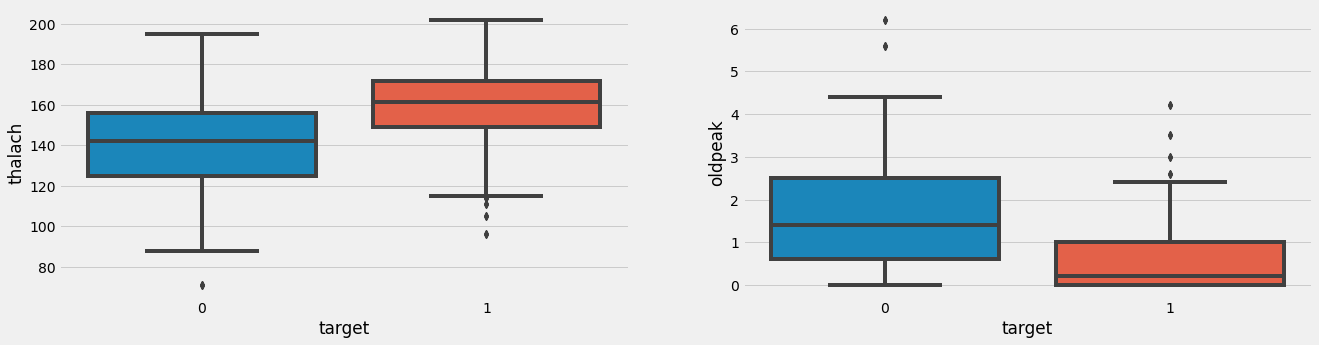

In [9]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Boxplot Kolom Numerik', fontsize=25)
sns.boxplot(y='age',x='target',data=data,ax=ax[0])
sns.boxplot(y='trestbps',x='target',data=data,ax=ax[1])
sns.boxplot(y='chol',x='target',data=data,ax=ax[2])

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(y='thalach',x='target',data=data,ax=ax[0])
sns.boxplot(y='oldpeak',x='target',data=data,ax=ax[1])

plt.show()

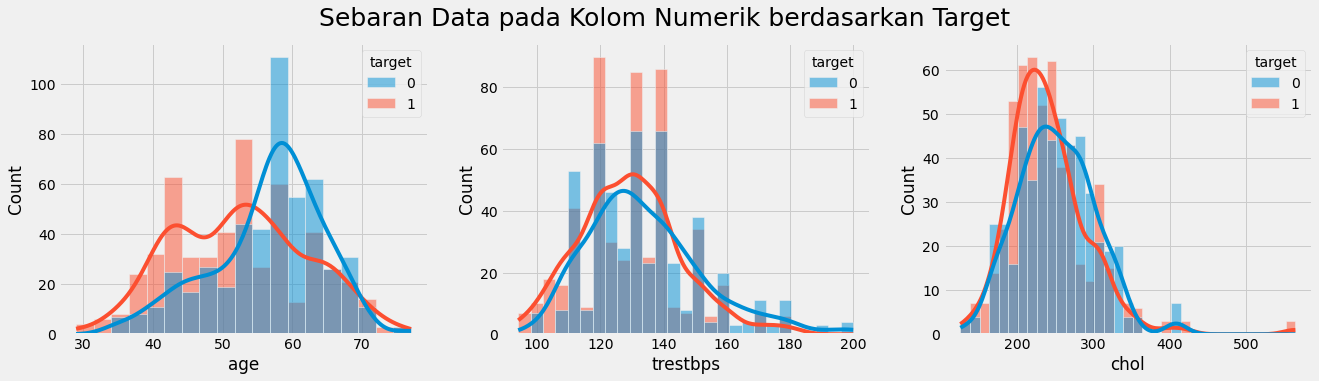

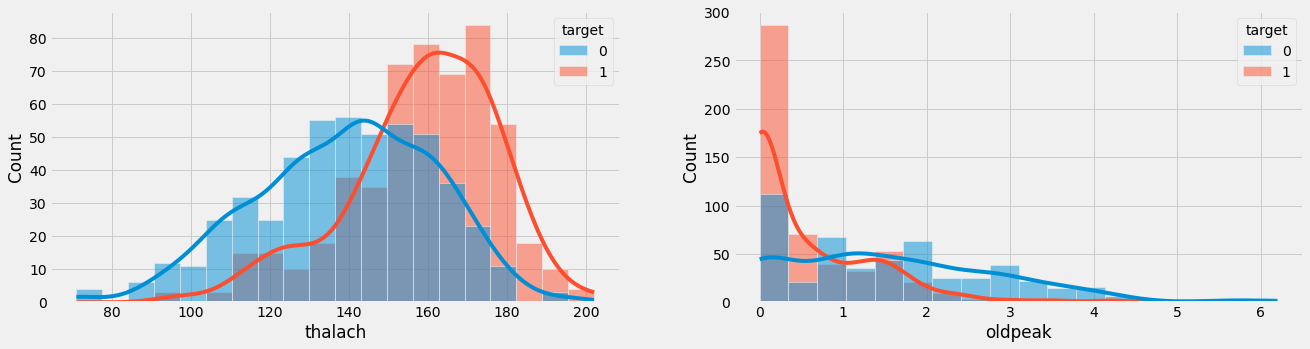

In [10]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Sebaran Data pada Kolom Numerik berdasarkan Target', fontsize=25)
sns.histplot(x = 'age',data=data,kde=True,ax=ax[0],hue='target')
sns.histplot(x='trestbps',data=data,kde=True,ax=ax[1],hue='target')
sns.histplot(x='chol',data=data,kde=True,ax=ax[2],hue='target')

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.histplot(x = 'thalach',data=data,kde=True,ax=ax[0],hue='target')
sns.histplot(x='oldpeak',data=data,kde=True,ax=ax[1],hue='target')

plt.show()

Visualisasi sebaran data memberikan kita gambaran bahwa data pasien yang memiliki angka thalach atau maximum heart rate achieved yang tinggi, maka kecenderungan untuk memiliki penyakit jantung semakin besar.

# Removing Outliers

Menghapus outliers menggunakan metode zscore dengan cara mengeliminasi data-data yang memiliki zscore di atas 3

In [11]:
z = np.abs(stats.zscore(data[numerik]))

In [12]:
np.where(z>3)

(array([ 54,  55,  69, 123, 151, 158, 175, 179, 192, 246, 267, 294, 296,
        326, 378, 393, 450, 464, 481, 508, 526, 559, 613, 641, 665, 685,
        688, 833, 889, 958, 996], dtype=int64),
 array([4, 4, 4, 2, 1, 2, 1, 2, 2, 1, 3, 1, 3, 1, 3, 4, 2, 2, 2, 1, 4, 3,
        4, 2, 2, 2, 1, 4, 2, 2, 2], dtype=int64))

In [13]:
data = data.drop(np.unique(np.where(z>3)[0]))
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Correlation

In [14]:
numerik.append('target')

In [15]:
numerik

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

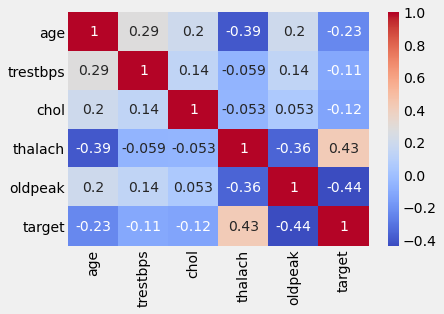

In [16]:
sns.heatmap(data[numerik].corr(), annot=True, cmap='coolwarm')
plt.show()

Dari sini dapat dilihat bahwa hanya ada satu feature yang memiliki korelasi positif dengan target, yaitu thalach. Selain itu, ada satu feature yang memiliki korelasi negatif dengan tingkat korelasi sedang yaitu oldpeak

# Scaling Data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

In [19]:
numerik[0:-1]

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [20]:
data_numerik = sc.fit_transform(data[numerik[0:-1]])
data_numerik = pd.DataFrame(data_numerik,columns=numerik[0:-1])
data_numerik

,age,trestbps,chol,thalach,oldpeak
0,-0.246632,-0.359915,-0.683788,0.824502,-0.013327
1,-0.136748,0.536116,-0.879131,0.246944,1.918553
2,1.731288,0.834794,-1.508569,-1.085883,1.458582
3,0.742328,1.014000,-0.879131,0.513509,-0.933270
4,0.852213,0.416646,1.096004,-1.930006,0.814621
...,...,...,...,...,...
989,0.522559,0.536116,-0.488445,0.646792,-0.933270
990,0.632444,-0.359915,0.314632,-0.375042,1.642570
991,-0.796054,-1.255946,0.683613,-1.396876,-0.013327
992,-0.466401,-1.255946,0.227813,0.424654,-0.933270


In [21]:
X = pd.concat([data_numerik.reset_index(drop=True),data[kategorik].reset_index(drop=True)],axis=1)
X

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,-0.246632,-0.359915,-0.683788,0.824502,-0.013327,1,0,0,1,0,2,2,3
1,-0.136748,0.536116,-0.879131,0.246944,1.918553,1,0,1,0,1,0,0,3
2,1.731288,0.834794,-1.508569,-1.085883,1.458582,1,0,0,1,1,0,0,3
3,0.742328,1.014000,-0.879131,0.513509,-0.933270,1,0,0,1,0,2,1,3
4,0.852213,0.416646,1.096004,-1.930006,0.814621,0,0,1,1,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,0.522559,0.536116,-0.488445,0.646792,-0.933270,1,1,0,1,1,2,0,2
990,0.632444,-0.359915,0.314632,-0.375042,1.642570,1,0,0,0,1,1,1,3
991,-0.796054,-1.255946,0.683613,-1.396876,-0.013327,1,0,0,0,1,1,1,2
992,-0.466401,-1.255946,0.227813,0.424654,-0.933270,0,0,0,0,0,2,0,2


In [22]:
y = data['target']
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 994, dtype: int64

# Modeling Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=54)

### Logistic Regression

In [25]:
model_logreg = LogisticRegression(solver="liblinear")

In [26]:
model_logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [27]:
y_pred = model_logreg.predict(X_test)

In [28]:
acc_logreg = accuracy_score(y_pred, y_test)
print("akurasi:", accuracy_score(y_pred, y_test))

akurasi: 0.8327759197324415


In [29]:
print(classification_report(y_test, model_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       131
           1       0.84      0.86      0.85       168

    accuracy                           0.83       299
   macro avg       0.83      0.83      0.83       299
weighted avg       0.83      0.83      0.83       299



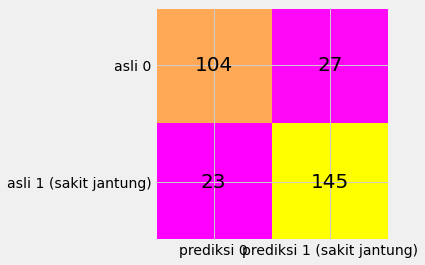

In [30]:
cm = confusion_matrix(y_test, model_logreg.predict(X_test))

fig,ax = plt.subplots(figsize=(4,4))
ax.imshow(cm, cmap="spring")


ax.xaxis.set(ticks=(0,1), ticklabels=('prediksi 0', 'prediksi 1 (sakit jantung)'))
ax.yaxis.set(ticks=(0,1), ticklabels=('asli 0', 'asli 1 (sakit jantung)'))

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], 
                ha='center', va='center', color='black',
                fontsize=20)

In [31]:
### K-Nearest Neighbor

In [32]:
model_knn = KNeighborsClassifier(n_neighbors=10)

In [33]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [34]:
y_pred = model_knn.predict(X_test)

In [35]:
print("akurasi:", accuracy_score(y_pred, y_test))

akurasi: 0.8461538461538461


Text(0, 0.5, 'Tingkat akurasi')

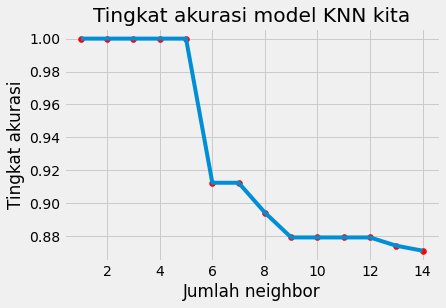

In [36]:
koleksi_score = []
k = range(1,15,1)
for i in k:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X, y)
    koleksi_score.append(model.score(X, y))
    

plt.plot(k, koleksi_score)
plt.scatter(k, koleksi_score, color="red")

plt.title("Tingkat akurasi model KNN kita")
plt.xlabel("Jumlah neighbor")
plt.ylabel("Tingkat akurasi")

In [37]:
#readjust jumlah neighbors
model_knn = KNeighborsClassifier(n_neighbors=9)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
acc_knn = accuracy_score(y_pred, y_test)
print("akurasi:", accuracy_score(y_pred, y_test))

akurasi: 0.8528428093645485


### SVM

In [38]:
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
acc_svm = accuracy_score(y_pred, y_test)
print("akurasi:", accuracy_score(y_pred, y_test))

akurasi: 0.8494983277591973


### Naive Bayes

In [39]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)
acc_nb = accuracy_score(y_pred, y_test)
print("akurasi:", accuracy_score(y_pred, y_test))

akurasi: 0.8361204013377926


### Decision Tree

In [40]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
acc_tree = accuracy_score(y_pred, y_test)
print("akurasi:", accuracy_score(y_pred, y_test))

akurasi: 0.9899665551839465


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [42]:
# cek akurasi model
print("akurasi:", accuracy_score(y_pred, y_test))
print("classification report")
print(classification_report(y_pred, y_test))
print("confusion_matrix")
print(confusion_matrix(y_pred, y_test))

akurasi: 0.9899665551839465
classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       134
           1       0.98      1.00      0.99       165

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299

confusion_matrix
[[131   3]
 [  0 165]]


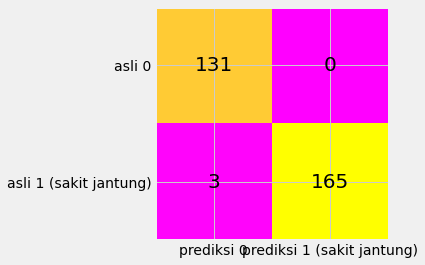

In [43]:
cm = confusion_matrix(y_test, model_tree.predict(X_test))

fig,ax = plt.subplots(figsize=(4,4))
ax.imshow(cm, cmap="spring")

ax.xaxis.set(ticks=(0,1), ticklabels=('prediksi 0', 'prediksi 1 (sakit jantung)'))
ax.yaxis.set(ticks=(0,1), ticklabels=('asli 0', 'asli 1 (sakit jantung)'))

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], 
                ha='center', va='center', color='black',
                fontsize=20)

### Random Forest

In [44]:
model_forest = RandomForestClassifier(n_estimators=100) 
model_forest.fit(X_train, y_train)
y_pred = model_forest.predict(X_test)
acc_forest = accuracy_score(y_pred, y_test)
print("akurasi:", accuracy_score(y_pred, y_test))

akurasi: 0.9899665551839465


In [45]:
model_forest.feature_importances_

array([0.08847336, 0.07267991, 0.07803597, 0.11025687, 0.125365  ,
       0.04015597, 0.12110281, 0.00961488, 0.01988063, 0.06704989,
       0.04009517, 0.12776683, 0.09952272])

In [46]:
df_fi = pd.DataFrame({"fitur":data.columns[:-1], 
        "level penting": model_forest.feature_importances_})
df_fi

,fitur,level penting
0,age,0.088473
1,sex,0.072680
2,cp,0.078036
3,trestbps,0.110257
4,chol,0.125365
5,fbs,0.040156
6,restecg,0.121103
7,thalach,0.009615
8,exang,0.019881
9,oldpeak,0.067050


In [47]:
df_fi.sort_values(by="level penting",
                 ascending=False,
                 inplace=True)
df_fi

,fitur,level penting
11,ca,0.127767
4,chol,0.125365
6,restecg,0.121103
3,trestbps,0.110257
12,thal,0.099523
0,age,0.088473
2,cp,0.078036
1,sex,0.072680
9,oldpeak,0.067050
5,fbs,0.040156


Text(0.5, 1.0, 'Feature Importance')

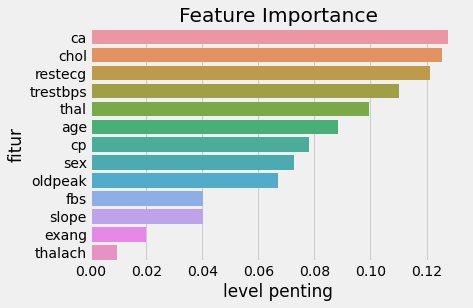

In [48]:
sns.barplot(x=df_fi['level penting'],
           y=df_fi['fitur']).set_title('Feature Importance')

# Rekap Akurasi Model

In [49]:
df_rekap = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest'], 
                         'akurasi':[acc_logreg, acc_knn, acc_svm, acc_nb, acc_tree, acc_forest]})

In [50]:
df_rekap

,model,akurasi
0,Logistic Regression,0.832776
1,KNN,0.852843
2,SVM,0.849498
3,Naive Bayes,0.836120
4,Decision Tree,0.989967
5,Random Forest,0.989967


In [51]:
df_rekap.sort_values(by="akurasi",
                 ascending=False,
                 inplace=True)
df_rekap

,model,akurasi
4,Decision Tree,0.989967
5,Random Forest,0.989967
1,KNN,0.852843
2,SVM,0.849498
3,Naive Bayes,0.836120
0,Logistic Regression,0.832776


Text(0.5, 1.0, 'Rekap Akurasi Model')

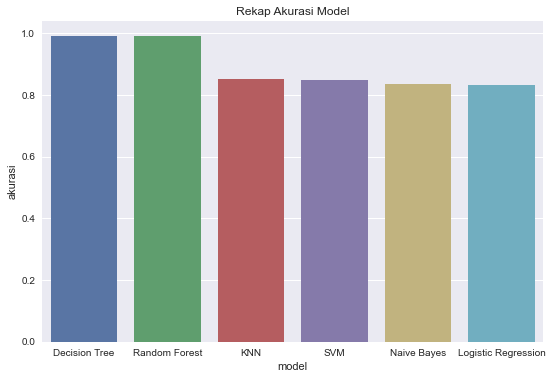

In [52]:
plt.style.use('seaborn')
sns.barplot(x=df_rekap['model'],
           y=df_rekap['akurasi']).set_title('Rekap Akurasi Model')

Model yang memiliki akurasi tertinggi adalah random forest dan decision tree

Namun, kedua model tersebut rawan terjadi overfitting dan lebih cocok digunakan untuk data yang sangat besar. Untuk pemodelan pada data heart ini, akan lebih cocok untuk menggunakan model seperti KNN atau SVM yang memiliki akurasi sekitar 0.85-0.84